In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


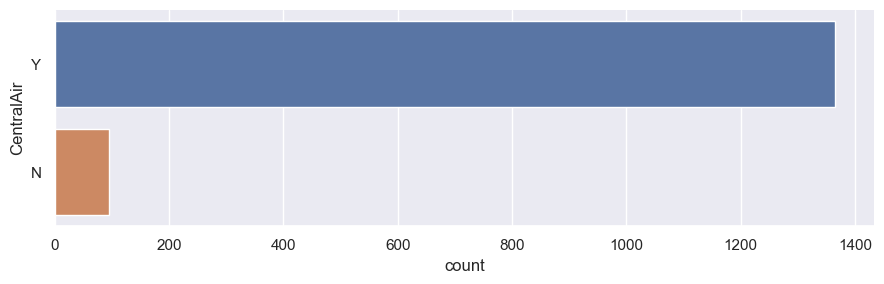

In [3]:
sb.catplot(y = 'CentralAir', data = houseData, kind = 'count', height = 3, aspect = 3)

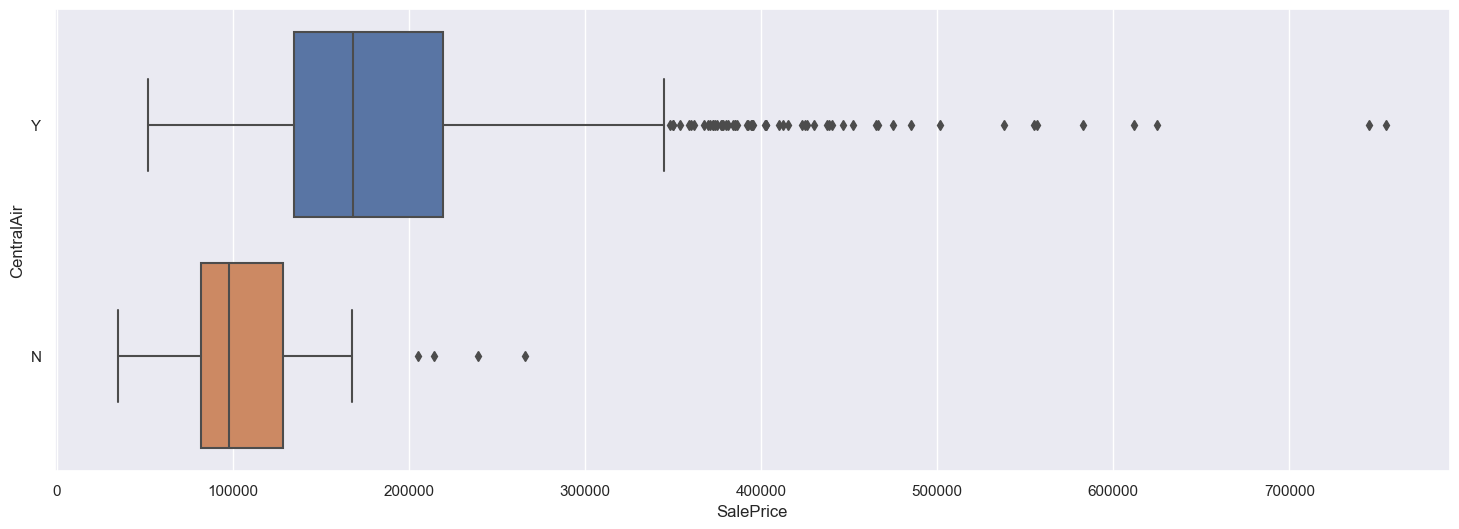

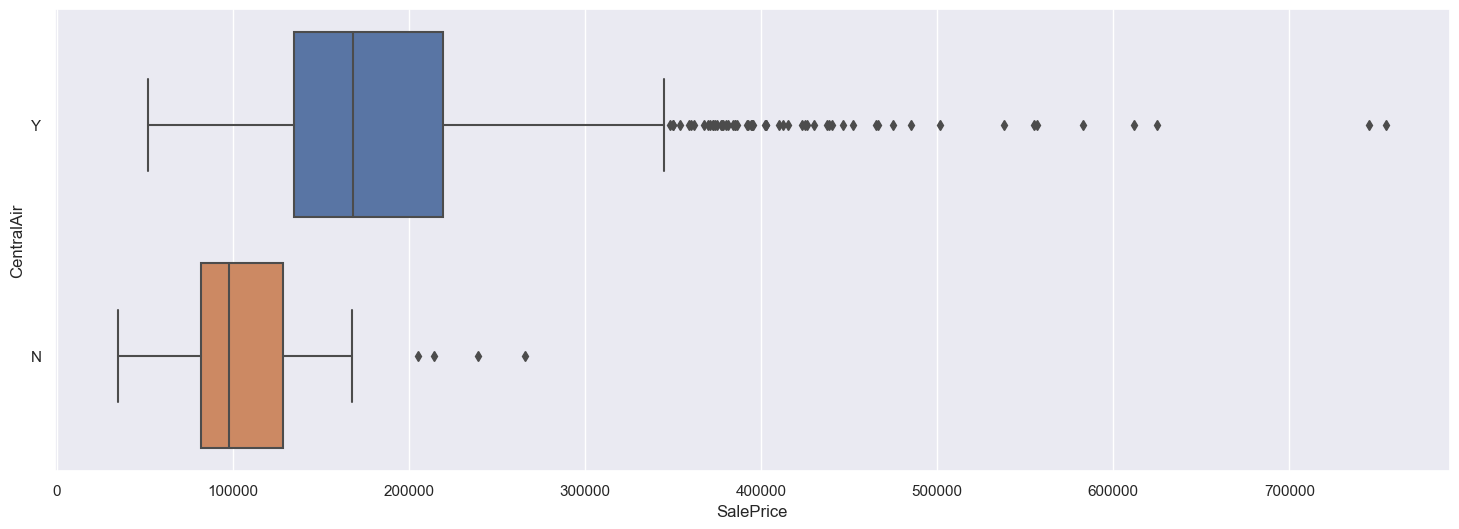

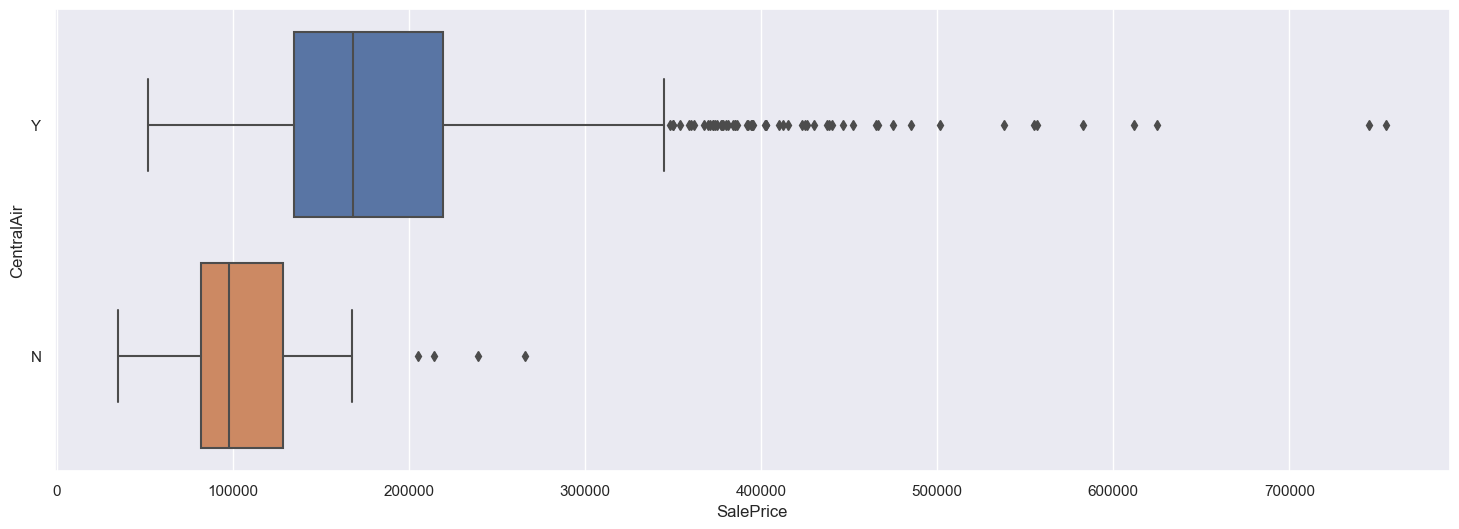

In [8]:
f = plt.figure(figsize=(18, 6))
sb.boxplot(data = houseData , y = 'CentralAir', x = 'SalePrice', orient = "h")
plt.show()

C:\Users\LRXCalvin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


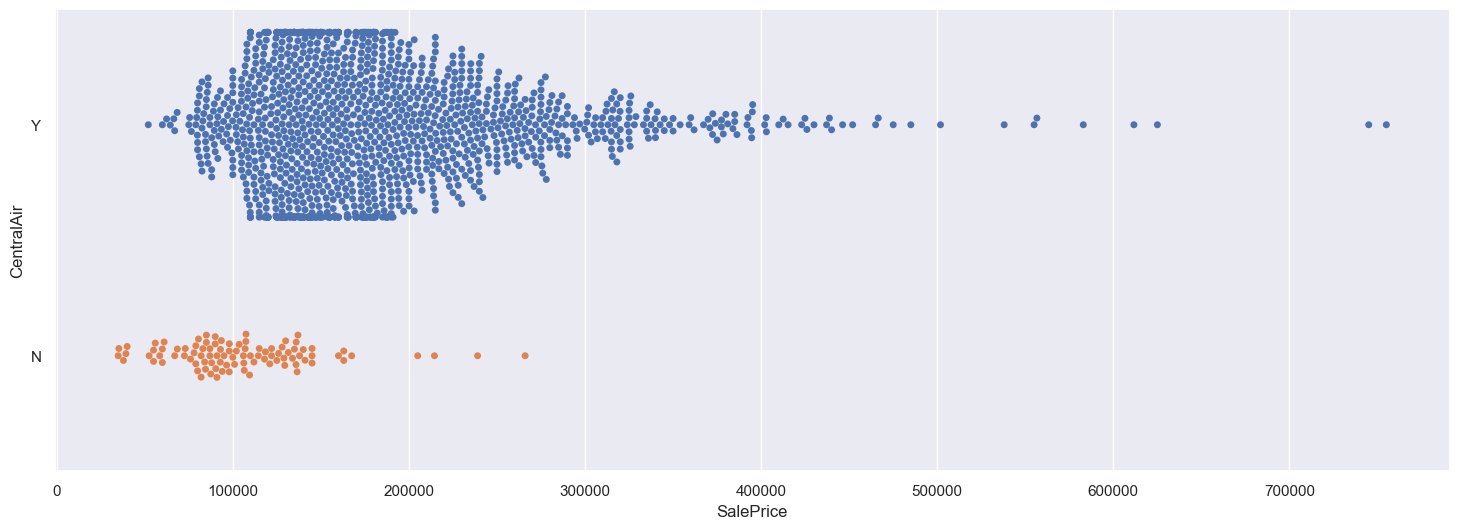

In [9]:
f = plt.figure(figsize=(18, 6))
sb.swarmplot(data = houseData , y = 'CentralAir', x = 'SalePrice', orient = "h")
plt.show()

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dectree = DecisionTreeClassifier(max_depth = 2)

In [15]:
houseData_train, houseData_test = train_test_split(houseData, train_size = 1100, test_size = 360)

In [16]:
y_train = pd.DataFrame(houseData_train['CentralAir'])
X_train = pd.DataFrame(houseData_train['SalePrice'])

In [17]:
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

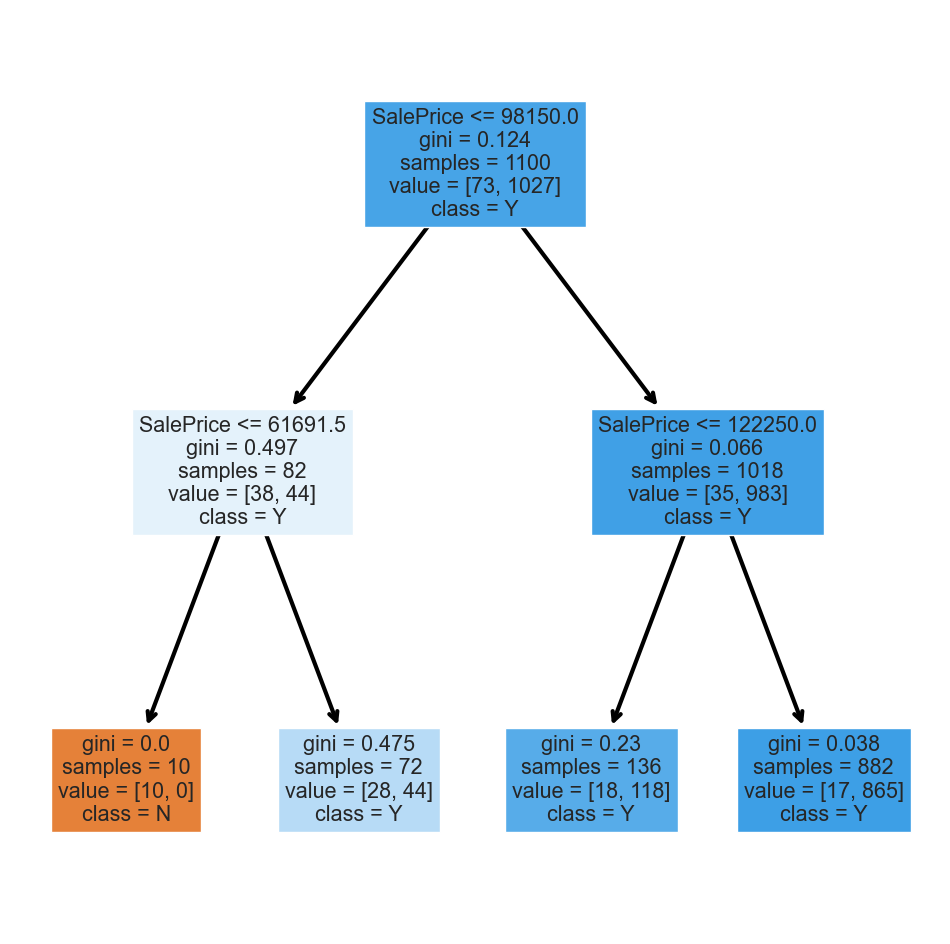

In [18]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Classification Accuracy 	: 0.9427272727272727


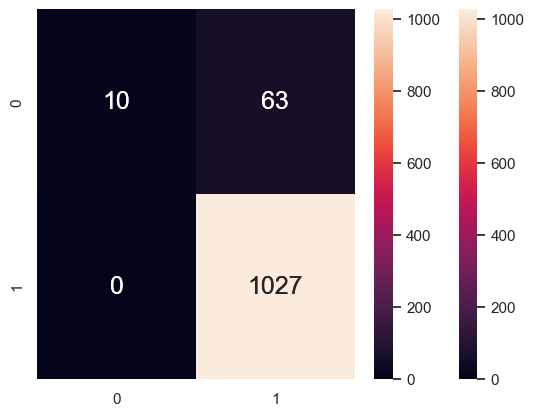

In [20]:
# Predict Legendary corresponding to Total Train
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

In [22]:
y_test = pd.DataFrame(houseData_test['CentralAir'])
X_test = pd.DataFrame(houseData_test['SalePrice'])

Classification Accuracy 	: 0.9416666666666667


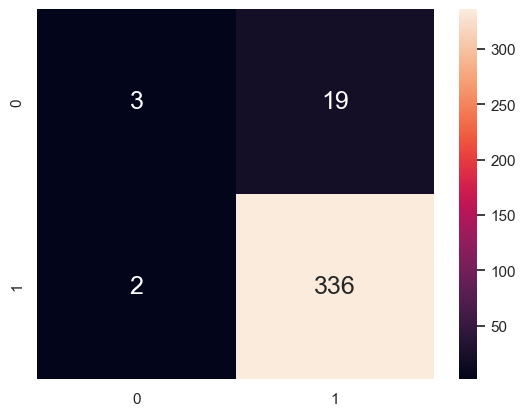

In [23]:
# Predict Legendary corresponding to Total Train
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()